In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from napari_simpleitk_image_processing import threshold_otsu, median_filter, gaussian_blur, signed_maurer_distance_map,\
    morphological_watershed, morphological_watershed, connected_component_labeling, \
    touching_objects_labeling, watershed_otsu_labeling, binary_fill_holes

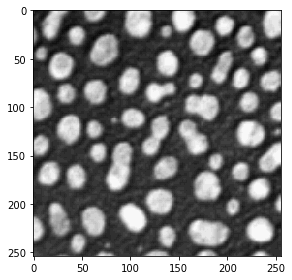

In [2]:
blobs = imread('https://samples.fiji.sc/blobs.png')
imshow(blobs)

## Median filter

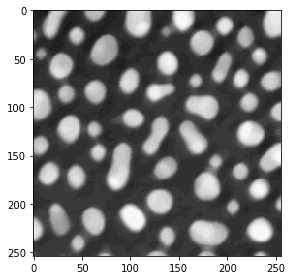

In [3]:
imshow(median_filter(blobs, 5, 5, 0))

# Gaussian blur

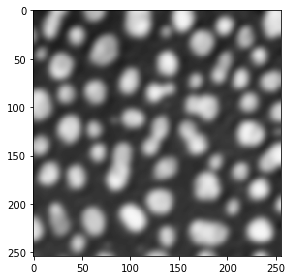

In [4]:
imshow(gaussian_blur(blobs, 10, 10, 0))

## Threshold Otsu

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


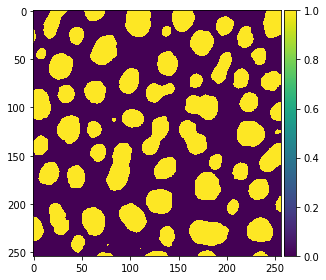

In [5]:
from napari_simpleitk_image_processing import threshold_otsu
binary = threshold_otsu(blobs)
imshow(binary)

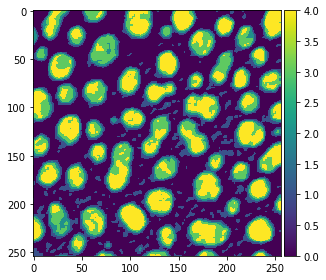

In [6]:
from napari_simpleitk_image_processing import otsu_multiple_thresholds
imshow(otsu_multiple_thresholds(blobs, number_of_thresholds=4))

## Distance Map

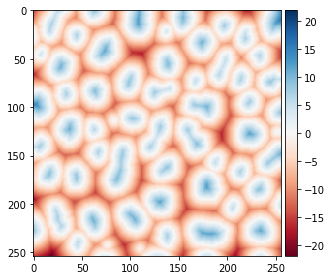

In [7]:
distance_image = signed_maurer_distance_map(binary)
imshow(distance_image)

## Morphological Watershed

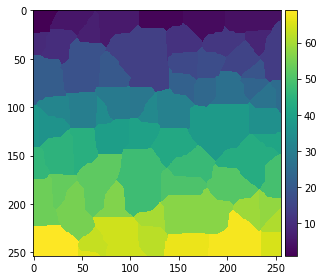

In [8]:
imshow(morphological_watershed(distance_image))

## Connected component labeling

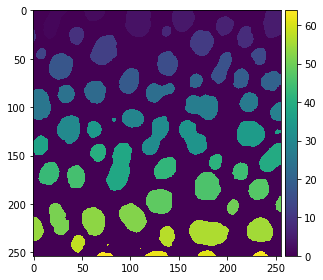

In [9]:
imshow(connected_component_labeling(binary))

## Touching objects labeling

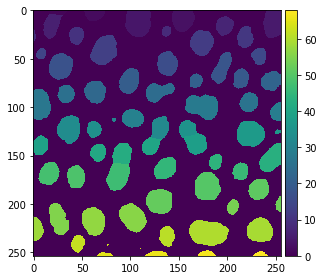

In [10]:
touching_labels = touching_objects_labeling(binary)
imshow(touching_labels)


## Watershed-Otsu-Labeling

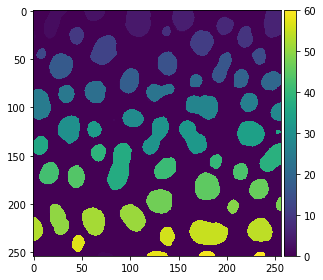

In [11]:
labels = watershed_otsu_labeling(blobs)
imshow(labels)

## Simple linear iterative clustering

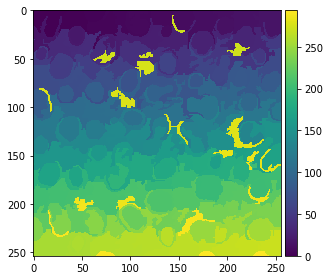

In [12]:
from napari_simpleitk_image_processing import simple_linear_iterative_clustering
imshow(simple_linear_iterative_clustering(blobs, grid_size_x=15, grid_size_y=15))

## Scalar image K-means clustering

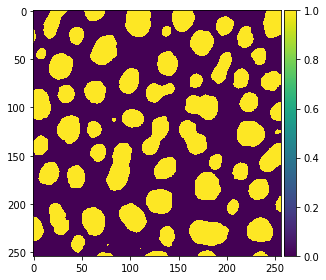

In [13]:
from napari_simpleitk_image_processing import scalar_image_k_means_clustering
imshow(scalar_image_k_means_clustering(blobs))

## Label post-processing

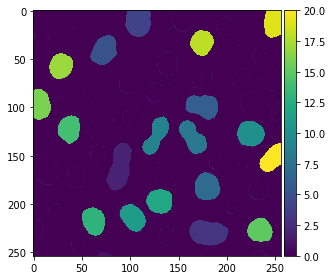

In [14]:
from napari_simpleitk_image_processing import relabel_component
imshow(relabel_component(labels, minimumObjectSize=450))

## Label contours

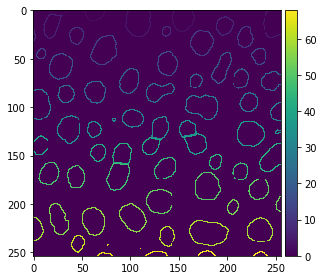

In [15]:
from napari_simpleitk_image_processing import label_contour
imshow(label_contour(touching_labels))

## Label statistics

In [16]:
from napari_simpleitk_image_processing import label_statistics
regionprops = label_statistics(blobs, labels, None, True, True, True, True, True, True)

print(regionprops.keys())
pd.DataFrame(regionprops)

dict_keys(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum', 'variance', 'bbox_0', 'bbox_1', 'bbox_2', 'bbox_3', 'centroid_0', 'centroid_1', 'elongation', 'feret_diameter', 'flatness', 'roundness', 'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1', 'equivalent_spherical_perimeter', 'equivalent_spherical_radius', 'number_of_pixels', 'number_of_pixels_on_border', 'perimeter', 'perimeter_on_border', 'perimeter_on_border_ratio', 'principal_axes0', 'principal_axes1', 'principal_axes2', 'principal_axes3', 'principal_moments0', 'principal_moments1'])


,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
0,1,224.0,137.526132,136.0,112.0,13.360739,157880.0,178.509343,0,0,...,36,2461.579651,36.0,0.014625,-0.574118,-0.818773,0.818773,-0.574118,5063.911496,5560.184284
1,2,232.0,193.014354,200.0,128.0,28.559077,80680.0,815.620897,11,0,...,16,85.499572,16.0,0.187135,0.902494,0.430703,-0.430703,0.902494,17.056706,72.884853
2,3,224.0,179.846995,184.0,128.0,21.328889,32912.0,454.921516,53,0,...,21,53.456120,21.0,0.392846,-0.042759,-0.999085,0.999085,-0.042759,8.637199,27.432794
3,4,248.0,207.082171,216.0,120.0,27.772832,133568.0,771.330194,95,0,...,23,93.409370,23.0,0.246228,0.991601,0.129334,-0.129334,0.991601,48.975064,55.851742
4,5,248.0,223.146402,232.0,128.0,30.246515,89928.0,914.851647,144,0,...,19,74.218143,19.0,0.256002,0.974707,0.223487,-0.223487,0.974707,32.059800,33.765222
5,6,248.0,214.906725,224.0,128.0,26.386796,99072.0,696.263020,238,0,...,39,80.787183,40.0,0.495128,0.999408,0.034407,-0.034407,0.999408,23.320204,59.820502
6,7,248.0,211.565891,224.0,136.0,30.197236,54584.0,911.873073,189,7,...,0,57.938471,0.0,0.000000,0.932037,0.362364,-0.362364,0.932037,18.705896,22.720115
7,8,200.0,166.171429,168.0,136.0,16.466894,11632.0,271.158592,133,17,...,0,29.917295,0.0,0.000000,0.960385,0.278678,-0.278678,0.960385,4.741825,6.584094
8,9,224.0,176.932331,176.0,128.0,24.022064,47064.0,577.059555,211,17,...,0,59.834590,0.0,0.000000,0.997651,0.068495,-0.068495,0.997651,14.969363,30.395186
9,10,240.0,191.598174,200.0,128.0,28.239851,41960.0,797.489171,37,18,...,0,53.360835,0.0,0.000000,0.992904,0.118917,-0.118917,0.992904,15.331341,19.871929


## Edge enhancement / edge detection

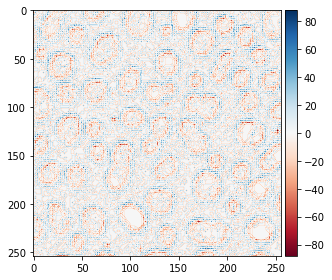

In [17]:
from napari_simpleitk_image_processing import laplacian_filter
imshow(laplacian_filter(blobs))

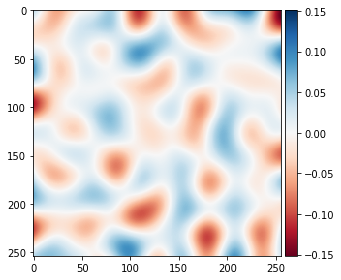

In [18]:
from napari_simpleitk_image_processing import laplacian_of_gaussian_filter
imshow(laplacian_of_gaussian_filter(blobs, sigma=20))

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


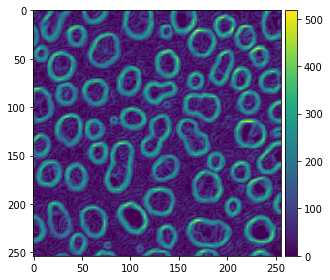

In [19]:
from napari_simpleitk_image_processing import sobel
imshow(sobel(blobs))

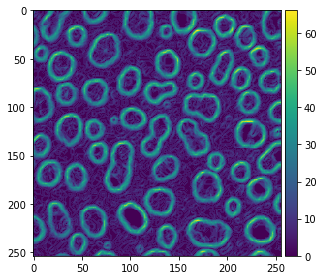

In [20]:
from napari_simpleitk_image_processing import gradient_magnitude
imshow(gradient_magnitude(blobs))

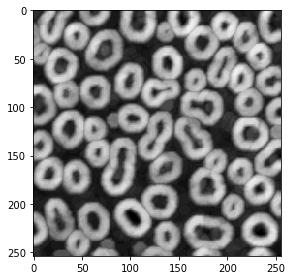

In [21]:
from napari_simpleitk_image_processing import morphological_gradient
imshow(morphological_gradient(blobs))

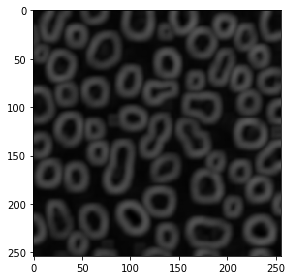

In [22]:
from napari_simpleitk_image_processing import standard_deviation_filter
imshow(standard_deviation_filter(blobs))

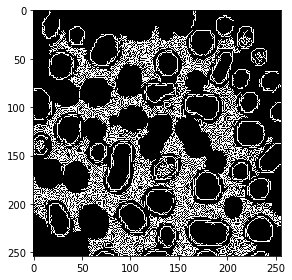

In [23]:
from napari_simpleitk_image_processing import canny_edge_detection
imshow(canny_edge_detection(blobs))

## Denoising

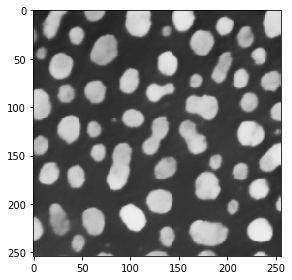

In [24]:
from napari_simpleitk_image_processing import bilateral_filter
imshow(bilateral_filter(blobs, radius=10))

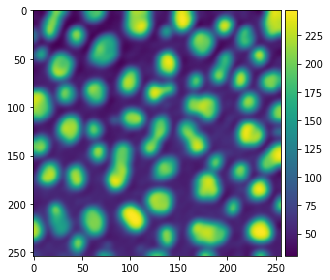

In [25]:
from napari_simpleitk_image_processing import binominal_blur_filter
imshow(binominal_blur_filter(blobs, repetitions=20))

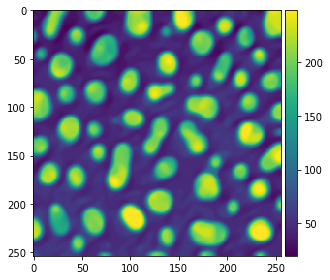

In [26]:
from napari_simpleitk_image_processing import curvature_flow_denoise
imshow(curvature_flow_denoise(blobs, number_of_iterations=150))

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


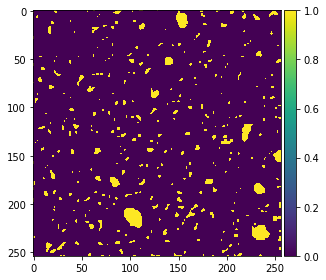

In [27]:
from napari_simpleitk_image_processing import regional_maxima
imshow(regional_maxima(blobs))

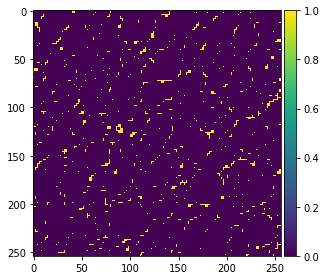

In [28]:
from napari_simpleitk_image_processing import regional_minima
imshow(regional_minima(blobs))

## Deconvolution

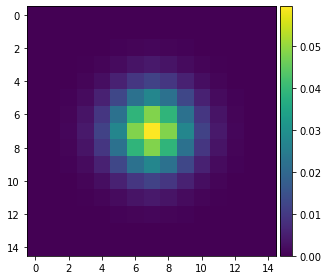

In [29]:
kernel = np.zeros((15, 15))
kernel[7,7] = 1
kernel = gaussian_blur(kernel, variance_x=3, variance_y=3)
imshow(kernel)

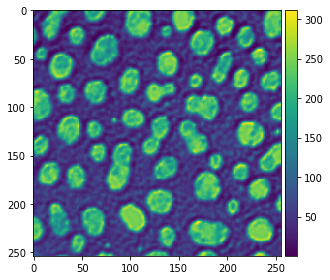

In [30]:
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
imshow(richardson_lucy_deconvolution(blobs, kernel))

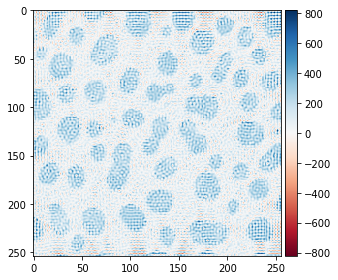

In [31]:
from napari_simpleitk_image_processing import wiener_deconvolution
imshow(wiener_deconvolution(blobs, kernel))

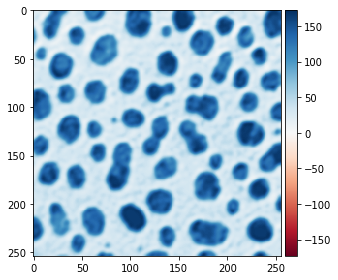

In [32]:
from napari_simpleitk_image_processing import tikhonov_deconvolution
imshow(tikhonov_deconvolution(blobs, kernel, regularization_constant=0.5))

## Background / foreground removal

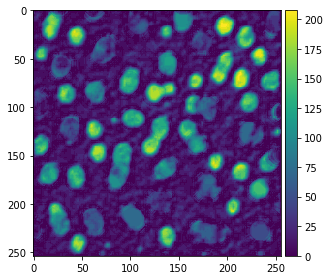

In [33]:
from napari_simpleitk_image_processing import white_top_hat
imshow(white_top_hat(blobs))

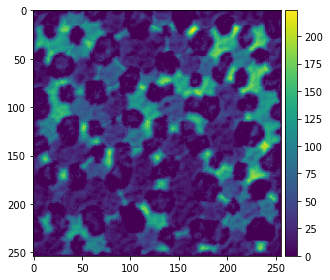

In [34]:
from napari_simpleitk_image_processing import black_top_hat
imshow(black_top_hat(blobs))

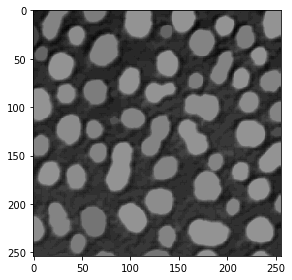

In [35]:
from napari_simpleitk_image_processing import h_maxima
imshow(h_maxima(blobs, height=100))

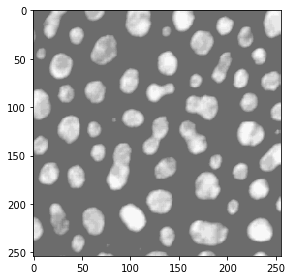

In [36]:
from napari_simpleitk_image_processing import h_minima
imshow(h_minima(blobs, height=100))

## Other filters

0.9999999999999999


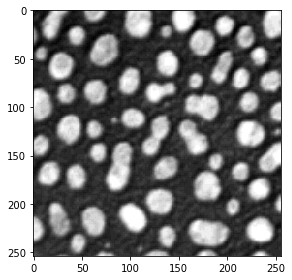

In [37]:
from napari_simpleitk_image_processing import rescale_intensity
rescaled = rescale_intensity(blobs)

print(rescaled.max())
imshow(rescaled)

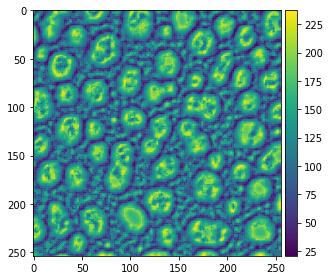

In [38]:
from napari_simpleitk_image_processing import adaptive_histogram_equalization
imshow(adaptive_histogram_equalization(blobs, radius_x=5, radius_y=5))

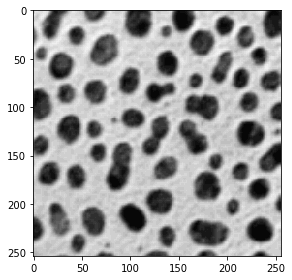

In [39]:
from napari_simpleitk_image_processing import invert_intensity
imshow(invert_intensity(blobs))